First Steps about Dataset:

You can download the dataset from https://www.kaggle.com/datasets/avilaqba/brain-connectivity-matrix-dataset/data

In this dataset, as an input, you are given low-resolution (LR) encodings of brain connectivity in a symmetric connectivity matrix 𝐗𝑳𝑹 ∈ ℝ160 ×160, where element 𝐗𝑳𝑹(i, j) denotes the strength of the connectivity between two brain regions i and j. The goal in this dataset is to train a machine learning model that predicts the high-resolution (HR) connectivity matrix 𝐗𝑯𝑹 ∈ ℝ268 ×268, given the LR connectivity matrix 𝐗𝑳𝑹 of the same brain, which is called brain graph super resolution. By vectorizing the off-diagonal upper triangular part of 𝐗𝑳𝑹 and 𝐗𝑯𝑹, we generate feature vectors x_𝑳𝑹 ∈ ℝ1 ×12720 and x_𝑯𝑹 ∈ ℝ1 ×35778 representing LR and HR connectivity features of a single sample.
By stacking the samples vectors vertically across N=189 subjects, we construct the LR data matrix 𝐃𝑳𝑹 ∈ ℝN ×12720 and HR data matrix 𝐃𝑯𝑹 ∈ ℝN ×35778.



It appears that we're working with brain connectivity data in the form of symmetric connectivity matrices. The LR data has dimensions of 160x160, while the HR data has dimensions of 268x268. You've also described how you generate feature vectors from these matrices.

Here's a summary of the dataset:

Input Data:

Low-resolution (LR) connectivity matrix 𝐗𝑳𝑹 ∈ ℝ160 × 160.
High-resolution (HR) connectivity matrix 𝐗𝑯𝑹 ∈ ℝ268 × 268.
Feature Vectors:

LR feature vector 𝑥_𝑳𝑹 ∈ ℝ1 × 12720.
HR feature vector 𝑥_𝑯𝑹 ∈ ℝ1 × 35778.
Data Matrix:

Stacking the sample vectors vertically across N=189 subjects.
LR data matrix 𝐃𝑳𝑹 ∈ ℝN × 12720.
HR data matrix 𝐃𝑯𝑹 ∈ ℝN × 35778.

In [1]:
#@title Data Processing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install kaggle

In [4]:
! pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jrdvp01","key":"779bb192708d08d46c832c80630e0d28"}'}

In [5]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d avilaqba/brain-connectivity-matrix-dataset


 82% 57.0M/69.6M [00:00<00:00, 98.1MB/s]
100% 69.6M/69.6M [00:00<00:00, 104MB/s] 


In [7]:
!unzip brain-connectivity-matrix-dataset.zip -d brain_data


Archive:  brain-connectivity-matrix-dataset.zip
  inflating: brain_data/test_LR.csv  
  inflating: brain_data/train_HR.csv  
  inflating: brain_data/train_LR.csv  


In [8]:
import os

# Define the path to the sfhq directory
dataset_path = 'brain_data'  # Change this if your directory is located elsewhere

# List all files and subdirectories in sfhq directory
contents = os.listdir(dataset_path)

# Print the list of contents
print(contents)


['train_LR.csv', 'train_HR.csv', 'test_LR.csv']


In [9]:
import pandas as pd

# Load the datasets
test_LR = pd.read_csv('brain_data/test_LR.csv')
train_HR = pd.read_csv('brain_data/train_HR.csv')
train_LR = pd.read_csv('brain_data/train_LR.csv')


In [10]:
test_LR

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12711,f12712,f12713,f12714,f12715,f12716,f12717,f12718,f12719,f12720
0,0.666533,0.040586,0.000000,0.792594,0.644251,0.000000,0.716318,0.474759,0.365311,0.559940,...,0.148806,0.155033,0.394798,0.208659,0.526277,0.649130,0.012614,0.543954,0.552118,0.478173
1,0.370567,0.533937,0.366011,0.769466,0.728374,0.560125,0.660198,0.157739,0.718465,0.609882,...,0.063029,0.305907,0.267035,0.354357,0.127124,0.622367,0.364036,0.713182,0.498849,0.244497
2,0.783363,0.227065,0.468662,0.460541,0.757729,0.541527,0.477356,0.682122,0.581391,0.642649,...,0.612926,0.626693,0.456268,0.614165,0.676703,0.716778,0.691421,0.821228,0.693437,0.546759
3,0.608172,0.000000,0.113001,0.661246,0.809450,0.070359,0.612977,0.587807,0.041543,0.630283,...,0.000000,0.251011,0.159250,0.270008,0.193767,0.530593,0.291927,0.749266,0.284901,0.000000
4,0.000000,0.169929,0.320748,0.290593,0.594628,0.359162,0.250567,0.424881,0.447870,0.602709,...,0.054095,0.000000,0.076763,0.417416,0.353957,0.579904,0.341922,0.396550,0.616500,0.493917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.540032,0.549130,0.398610,0.500791,0.716594,0.389047,0.745792,0.336487,0.710413,0.425319,...,0.428295,0.709984,0.167658,0.259846,0.375765,0.673386,0.638520,0.807293,0.829016,0.139919
86,0.324266,0.369618,0.204912,0.486381,0.622411,0.223834,0.472711,0.363674,0.814642,0.397835,...,0.229438,0.542155,0.357404,0.037908,0.185267,0.707330,0.409686,0.684814,0.535255,0.513919
87,0.355580,0.175703,0.526724,0.188831,0.481059,0.360461,0.502281,0.549208,0.379564,0.566482,...,0.415699,0.423946,0.292703,0.765325,0.410336,0.569269,0.501224,0.709498,0.811708,0.453751
88,0.550682,0.492634,0.416039,0.425196,0.780370,0.312431,0.619254,0.785559,0.474216,0.874134,...,0.267842,0.077203,0.220186,0.519177,0.243968,0.749496,0.340808,0.514636,0.670811,0.533393


In [11]:
train_LR

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12711,f12712,f12713,f12714,f12715,f12716,f12717,f12718,f12719,f12720
0,0.207146,0.000000,0.125036,0.513916,0.454782,0.236312,0.264699,0.000000,0.557619,0.515015,...,0.288667,0.511579,0.313993,0.374745,0.451267,0.623494,0.534292,0.637110,0.703653,0.607822
1,0.390886,0.398502,0.115868,0.779319,0.259406,0.396310,0.829039,0.408362,0.463034,0.698273,...,0.280648,0.526213,0.521230,0.470551,0.605820,0.715619,0.566642,0.643381,0.501012,0.613715
2,0.659789,0.004432,0.076574,0.752408,0.745924,0.000000,0.655517,0.545877,0.314507,0.590367,...,0.169239,0.382797,0.324243,0.358898,0.201502,0.791955,0.505049,0.602114,0.489517,0.367311
3,0.591705,0.204612,0.175046,0.565744,0.584586,0.060878,0.628179,0.585861,0.320220,0.576614,...,0.172899,0.362106,0.261850,0.349772,0.000000,0.624934,0.069820,0.573976,0.393195,0.425913
4,0.381556,0.008404,0.704672,0.459716,0.638838,0.429525,0.654569,0.670515,0.430826,0.767706,...,0.044062,0.000000,0.027265,0.074954,0.048790,0.521427,0.030686,0.348275,0.431899,0.393250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0.023531,0.021375,0.481721,0.664497,0.410039,0.209960,0.599557,0.406597,0.452296,0.702351,...,0.289185,0.262785,0.200363,0.511441,0.231245,0.749202,0.568319,0.601434,0.535763,0.148385
185,0.637003,0.000000,0.000000,0.904449,0.741403,0.000000,0.804322,0.554245,0.000000,0.842709,...,0.142864,0.000000,0.021003,0.295663,0.214339,0.700056,0.260848,0.402451,0.729970,0.272758
186,0.501149,0.272043,0.355718,0.439114,0.832593,0.111165,0.553389,0.758354,0.466988,0.745879,...,0.206398,0.206882,0.216992,0.078338,0.086015,0.446454,0.346363,0.439479,0.601930,0.316662
187,0.550395,0.000000,0.000000,0.418595,0.819169,0.000000,0.450354,0.000000,0.408162,0.000000,...,0.162062,0.375854,0.566206,0.553768,0.454469,0.819755,0.662743,0.607758,0.727315,0.715364


In [12]:
train_HR

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f35769,f35770,f35771,f35772,f35773,f35774,f35775,f35776,f35777,f35778
0,0.558973,0.460617,0.699209,0.810637,0.512349,0.248422,0.138291,0.375640,0.535395,0.000000,...,0.000000,0.112739,0.000000,0.000000,0.000000,0.000000,0.000000,0.387951,0.731786,0.825953
1,0.897490,0.818441,0.808030,0.963510,0.892281,0.769649,0.686539,0.579353,0.870605,0.581849,...,0.000000,0.275411,0.000000,0.000000,0.190955,0.000000,0.126881,0.515614,0.633814,0.914033
2,0.660057,0.511451,0.801267,0.879895,0.647896,0.494254,0.098616,0.251185,0.514656,0.066410,...,0.000000,0.247483,0.000000,0.278442,0.113972,0.000000,0.000000,0.455757,0.497626,0.752551
3,0.508620,0.414329,0.834043,0.628656,0.820587,0.593572,0.522868,0.664395,0.817539,0.593967,...,0.000000,0.000000,0.000000,0.000000,0.120879,0.000000,0.000000,0.252551,0.420223,0.751839
4,0.154409,0.231525,0.697494,0.588065,0.572220,0.489811,0.560498,0.474577,0.695505,0.594588,...,0.202710,0.305557,0.119096,0.013516,0.309896,0.271863,0.233108,0.455488,0.438824,0.518460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,0.559467,0.620950,0.726282,0.790486,0.365540,0.324893,0.613084,0.621576,0.893367,0.264991,...,0.000000,0.020966,0.000000,0.000000,0.311344,0.114691,0.153634,0.463611,0.249022,0.478034
185,0.544251,0.535519,0.852058,0.742871,0.722251,0.510992,0.585163,0.730811,0.874088,0.480234,...,0.000000,0.000000,0.000000,0.000000,0.275010,0.000000,0.000000,0.329489,0.225171,0.608415
186,0.357177,0.387352,0.803451,0.423483,0.436067,0.310910,0.450662,0.747937,0.876578,0.224286,...,0.000000,0.116800,0.000000,0.000000,0.157549,0.155167,0.042509,0.339196,0.222570,0.498843
187,0.761067,0.710806,0.780296,0.750021,0.883335,0.504859,0.631922,0.675130,0.844767,0.457780,...,0.152971,0.477827,0.000000,0.044538,0.000000,0.150415,0.000000,0.530787,0.000000,0.686901


Preprocessing

In [13]:
train_LR.isna().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
         ..
f12716    0
f12717    0
f12718    0
f12719    0
f12720    0
Length: 12720, dtype: int64

In [14]:
train_HR.isna().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
         ..
f35774    0
f35775    0
f35776    0
f35777    0
f35778    0
Length: 35778, dtype: int64

In [15]:
test_LR.isna().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
         ..
f12716    0
f12717    0
f12718    0
f12719    0
f12720    0
Length: 12720, dtype: int64

In [16]:
train_LR.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12711,f12712,f12713,f12714,f12715,f12716,f12717,f12718,f12719,f12720
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,...,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.466382,0.222118,0.306443,0.551121,0.639445,0.283095,0.559101,0.448425,0.421375,0.603346,...,0.197513,0.246566,0.230220,0.260113,0.219518,0.544445,0.303591,0.533664,0.567001,0.387233
std,0.223653,0.209594,0.247373,0.214559,0.175281,0.224635,0.210105,0.229278,0.227676,0.188288,...,0.153868,0.186661,0.162883,0.183405,0.176218,0.192609,0.196132,0.158241,0.160877,0.183076
min,0.000000,0.000000,0.000000,0.000000,0.033869,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.321333,0.010514,0.079615,0.430856,0.541572,0.076529,0.439909,0.280617,0.283251,0.514886,...,0.070891,0.076460,0.083771,0.107792,0.062564,0.433465,0.137605,0.444925,0.456466,0.272561
50%,0.491392,0.197811,0.292711,0.571648,0.675180,0.263140,0.581821,0.484996,0.442816,0.621390,...,0.188338,0.229396,0.220105,0.245135,0.213656,0.572699,0.311650,0.546556,0.599634,0.397293
75%,0.638329,0.348390,0.482707,0.710475,0.776612,0.425260,0.721542,0.629346,0.583965,0.736132,...,0.284497,0.371662,0.337348,0.392652,0.350076,0.700056,0.459137,0.642955,0.684865,0.510947
max,0.993646,0.865276,0.939912,0.996690,0.994384,0.963303,0.953194,0.965438,0.994300,0.991052,...,0.641364,0.840599,0.672141,0.719618,0.893927,0.954222,0.797217,0.861304,0.899165,0.820384


In [17]:
train_HR.describe()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f35769,f35770,f35771,f35772,f35773,f35774,f35775,f35776,f35777,f35778
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,...,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.571694,0.576435,0.716066,0.675359,0.664791,0.485655,0.498260,0.472679,0.778219,0.303178,...,0.074788,0.165795,0.049698,0.093957,0.220694,0.124489,0.098578,0.318044,0.340823,0.561669
std,0.212728,0.192345,0.146298,0.162579,0.209619,0.204489,0.189986,0.176363,0.121210,0.187506,...,0.128953,0.175806,0.100443,0.135251,0.193043,0.164315,0.137147,0.220773,0.233646,0.212860
min,0.000000,0.030293,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.121261,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.439502,0.459069,0.654821,0.588065,0.558741,0.343706,0.393032,0.369060,0.724149,0.167239,...,0.000000,0.000000,0.000000,0.000000,0.023079,0.000000,0.000000,0.105269,0.160116,0.429571
50%,0.597992,0.605137,0.744195,0.700004,0.722141,0.504859,0.519609,0.476951,0.812801,0.299359,...,0.000000,0.115136,0.000000,0.018468,0.190955,0.057135,0.013922,0.329489,0.334385,0.585953
75%,0.747522,0.719708,0.814324,0.794802,0.820117,0.622169,0.632087,0.597610,0.853460,0.431201,...,0.115187,0.271542,0.053916,0.164793,0.344756,0.208406,0.176123,0.471277,0.528422,0.725741
max,0.951668,0.972310,0.969210,0.963510,0.961650,0.930483,0.960214,0.870002,0.986177,0.754722,...,0.781397,0.911452,0.567647,0.698702,0.844726,0.691198,0.839642,0.898876,0.855429,0.982567


In [18]:
print(test_LR.dtypes)
print(train_HR.dtypes)
print(train_LR.dtypes)


f1        float64
f2        float64
f3        float64
f4        float64
f5        float64
           ...   
f12716    float64
f12717    float64
f12718    float64
f12719    float64
f12720    float64
Length: 12720, dtype: object
f1        float64
f2        float64
f3        float64
f4        float64
f5        float64
           ...   
f35774    float64
f35775    float64
f35776    float64
f35777    float64
f35778    float64
Length: 35778, dtype: object
f1        float64
f2        float64
f3        float64
f4        float64
f5        float64
           ...   
f12716    float64
f12717    float64
f12718    float64
f12719    float64
f12720    float64
Length: 12720, dtype: object


Scaling,Normalization,PCA

In [20]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
train_LR_scaled = scaler.fit_transform(train_LR)


In [26]:
from sklearn.decomposition import PCA

# Define the number of components to retain
n_components = 10  # Adjust this based on your specific requirements

# Apply PCA
pca = PCA(n_components=n_components)
train_LR_pca = pca.fit_transform(train_LR_scaled)


In [32]:
import pandas as pd

# Assuming train_LR_pca is a NumPy array
train_LR_pca_df = pd.DataFrame(train_LR_pca)

# If you want to include column names
column_names = [f'f{i+1}' for i in range(n_components)]
train_LR_pca_df.columns = column_names


In [33]:
column_names

['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10']

In [34]:
train_LR_pca_df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,19.154964,-47.969985,-1.871649,2.906900,5.002550,-3.275997,-7.360257,-0.482080,16.736122,-12.867139
1,37.189355,32.205784,-36.182728,21.793190,-11.050410,19.152965,-11.091204,9.109205,22.209750,-7.665806
2,-45.429971,3.882071,-2.730644,-3.940573,4.604286,-5.820467,-0.961660,-8.414413,-6.815662,-5.222770
3,-2.760104,-37.693192,0.576286,4.479494,-6.843989,0.612419,-12.187861,-19.777676,-17.161909,3.037211
4,-25.885465,4.541286,-2.470150,0.222946,2.939778,6.018739,-1.586886,11.463529,17.184004,-15.593065
...,...,...,...,...,...,...,...,...,...,...
184,-37.304308,-2.216590,2.163445,5.789430,-0.943170,-1.598480,0.387886,9.245047,-3.846677,-23.066727
185,-10.672777,27.512014,4.293493,0.709293,22.699946,13.851567,24.796840,-13.644782,18.694143,-2.183987
186,-26.159696,7.065109,-6.135850,5.484158,-17.477673,-8.953794,8.056486,6.381163,-4.024004,2.900927
187,-31.442169,8.603892,3.721705,9.955815,20.958708,10.532018,-16.245514,-7.022381,-9.197491,3.612827


In [35]:
test_LR_scaled = scaler.fit_transform(test_LR)

In [36]:
test_LR_pca = pca.fit_transform(test_LR_scaled)

In [37]:
# Assuming train_LR_pca is a NumPy array
test_LR_pca_df = pd.DataFrame(test_LR_pca)

# If you want to include column names
column_names = [f'f{i+1}' for i in range(n_components)]
test_LR_pca_df.columns = column_names


In [38]:
test_LR_pca_df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,7.529909,22.660164,-8.467402,12.720231,8.152030,-2.184570,11.452591,-8.275094,-18.366253,-17.895172
1,8.787173,-18.135241,8.494686,-6.067293,-23.287927,-12.560526,23.460868,6.314252,9.890946,2.892233
2,61.543724,-10.353880,17.751172,3.924837,27.701866,-25.128544,42.659298,-0.834303,-10.339162,3.113892
3,13.081729,-2.018722,-8.284065,0.141130,6.258046,-18.293201,-10.888122,-25.985034,18.585195,4.647878
4,-36.892430,-16.530718,41.040294,15.887149,-9.478498,0.032628,-4.238034,2.185213,-1.242167,-2.137689
...,...,...,...,...,...,...,...,...,...,...
85,-20.802548,-24.472582,-11.026734,6.072925,6.060111,34.403290,5.377680,-24.973043,13.939993,-16.180710
86,0.573120,-24.789320,7.195252,-3.579524,-6.100699,6.290447,47.935981,5.664040,12.130732,6.764467
87,-14.546187,3.902762,16.987639,-9.362786,8.579502,-13.330041,14.528694,-18.780730,7.479879,-2.780144
88,36.307964,4.950181,-17.724834,-17.403303,-8.735526,30.517231,-0.220369,11.465263,-7.505449,28.022521


In [40]:
# Assuming train_LR_pca_df and test_LR_pca_df are your DataFrames

# Save train_LR_pca_df to CSV
train_LR_pca_df.to_csv('/content/drive/My Drive/SAC10548/train_LR_pca.csv', index=False)

# Save test_LR_pca_df to CSV
test_LR_pca_df.to_csv('/content/drive/My Drive/SAC10548/test_LR_pca.csv', index=False)


Starling Murmuration Optimization algorithm to select the features

In [93]:
def objective_function(feature_subset):
    selected_features = np.where(feature_subset == 1)[0]
    return np.sum(selected_features)


In [94]:
population_size = 20
num_features = train_LR_pca_df.shape[1]  # Assuming num_features is the number of columns in your feature DataFrames
num_iterations = 100
c1 = 2  # Social coefficient
c2 = 2  # Personal coefficient


In [95]:
import numpy as np
population = np.random.randint(2, size=(population_size, num_features))


In [96]:
# Define Initial Personal Best Positions and Fitness Values
personal_best_positions = population.copy()
personal_best_fitness = np.zeros(population_size)

In [97]:
for i in range(population_size):
    personal_best_fitness[i] = objective_function(population[i])

# Define Global Best Position and Fitness Value
global_best_position = population[np.argmax(personal_best_fitness)].copy()
global_best_fitness = np.max(personal_best_fitness)

In [98]:
# Main Loop
for iteration in range(num_iterations):
    for i in range(population_size):
        # Update Velocity
        velocity = c1 * np.random.random() * (personal_best_positions[i] - population[i]) \
                   + c2 * np.random.random() * (global_best_position - population[i])

        # Update Position
        population[i] = (population[i] + velocity > 0).astype(int)

        # Evaluate Fitness
        fitness = objective_function(population[i])

        # Update Personal Best if Necessary
        if fitness > personal_best_fitness[i]:
            personal_best_fitness[i] = fitness
            personal_best_positions[i] = population[i].copy()

        # Update Global Best if Necessary
        if fitness > global_best_fitness:
            global_best_fitness = fitness
            global_best_position = population[i].copy()

In [99]:
# Result
selected_features = np.where(global_best_position == 1)[0]
print("Selected Features:", selected_features)

Selected Features: [0 1 2 3 4 5 6 7 8 9]


In [100]:
train_LR_pca_selected = train_LR_pca_df.iloc[:, selected_features]
test_LR_pca_selected = test_LR_pca_df.iloc[:, selected_features]


In [50]:
train_LR_pca_selected

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,19.154964,-47.969985,-1.871649,2.906900,5.002550,-3.275997,-7.360257,-0.482080,16.736122,-12.867139
1,37.189355,32.205784,-36.182728,21.793190,-11.050410,19.152965,-11.091204,9.109205,22.209750,-7.665806
2,-45.429971,3.882071,-2.730644,-3.940573,4.604286,-5.820467,-0.961660,-8.414413,-6.815662,-5.222770
3,-2.760104,-37.693192,0.576286,4.479494,-6.843989,0.612419,-12.187861,-19.777676,-17.161909,3.037211
4,-25.885465,4.541286,-2.470150,0.222946,2.939778,6.018739,-1.586886,11.463529,17.184004,-15.593065
...,...,...,...,...,...,...,...,...,...,...
184,-37.304308,-2.216590,2.163445,5.789430,-0.943170,-1.598480,0.387886,9.245047,-3.846677,-23.066727
185,-10.672777,27.512014,4.293493,0.709293,22.699946,13.851567,24.796840,-13.644782,18.694143,-2.183987
186,-26.159696,7.065109,-6.135850,5.484158,-17.477673,-8.953794,8.056486,6.381163,-4.024004,2.900927
187,-31.442169,8.603892,3.721705,9.955815,20.958708,10.532018,-16.245514,-7.022381,-9.197491,3.612827


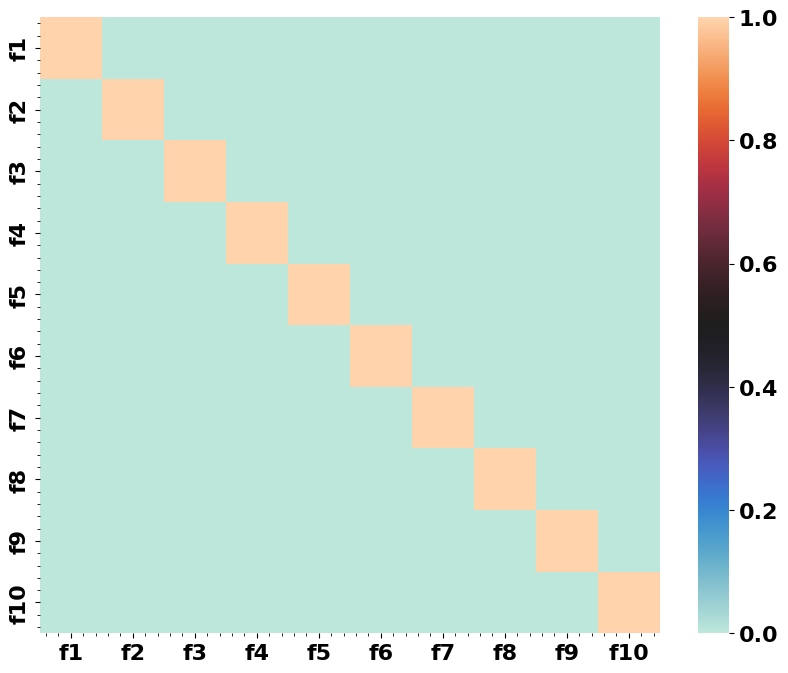

In [61]:
corr_mat_train= train_LR_pca_selected.corr()
import seaborn as sns
import matplotlib.pyplot as plt
# Plot Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat_train, annot=False,cmap='icefire',
            annot_kws={"size": 16, "weight": "bold"})


plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

# Adjust color bar font size and weight
colorbar = plt.gcf().get_axes()[1]
colorbar.tick_params(labelsize=16)
for label in colorbar.get_ymajorticklabels():
    label.set_weight('bold')

plt.minorticks_on()

plt.show()


In [62]:
global_best_fitness

45

In [65]:
fitness

45

Selected Features: [0 1 2 3 4 5 6 7 8 9]


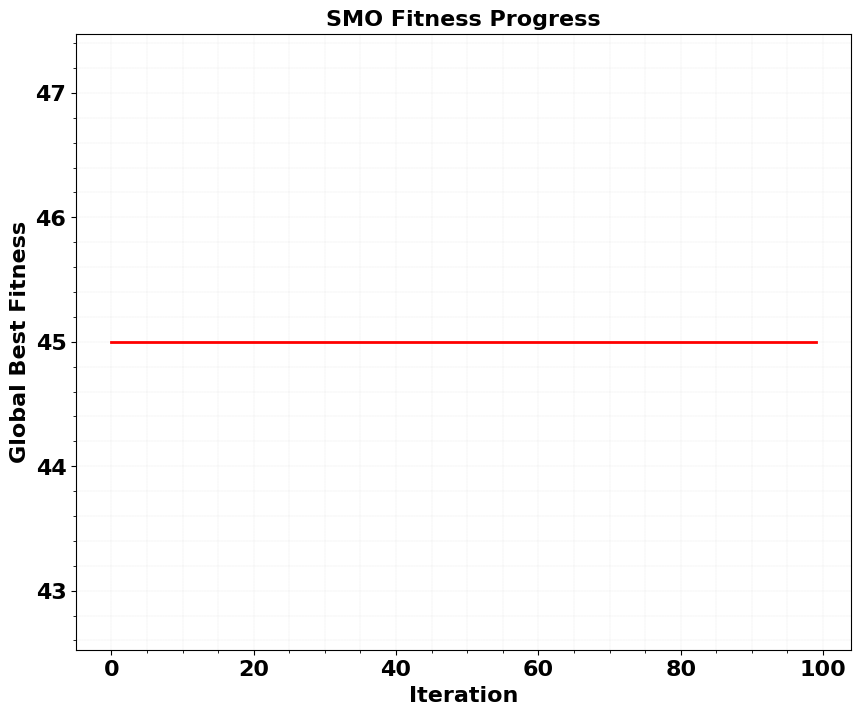

In [68]:
import matplotlib.pyplot as plt

# Initialize an empty list to store fitness values
fitness_values = []

# Main Loop
for iteration in range(num_iterations):
    for i in range(population_size):
        # Update Velocity
        velocity = c1 * np.random.random() * (personal_best_positions[i] - population[i]) \
                   + c2 * np.random.random() * (global_best_position - population[i])

        # Update Position
        population[i] = (population[i] + velocity > 0).astype(int)

        # Evaluate Fitness
        fitness = objective_function(population[i])

        # Update Personal Best if Necessary
        if fitness > personal_best_fitness[i]:
            personal_best_fitness[i] = fitness
            personal_best_positions[i] = population[i].copy()

        # Update Global Best if Necessary
        if fitness > global_best_fitness:
            global_best_fitness = fitness
            global_best_position = population[i].copy()

    # Append global best fitness to the list
    fitness_values.append(global_best_fitness)

# Result
selected_features = np.where(global_best_position == 1)[0]
print("Selected Features:", selected_features)
train_LR_pca_selected = train_LR_pca_df.iloc[:, selected_features]
test_LR_pca_selected = test_LR_pca_df.iloc[:, selected_features]

# Visualize the fitness values
plt.figure(figsize=(10,8))
plt.plot(range(num_iterations), fitness_values,linewidth=2,color='red')
plt.xlabel('Iteration',fontsize=16,fontweight='bold')
plt.ylabel('Global Best Fitness',fontsize=16,fontweight='bold')
plt.title('SMO Fitness Progress',fontsize=16,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')


plt.minorticks_on()
plt.grid(which='both', linestyle='dashed', linewidth=0.1)

plt.show()


Global Fitness value is 45 for every iterations

In [69]:
fitness_values

[45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45,
 45]

Selected Features: [0 1 2 3 4 5 6 7 8 9]


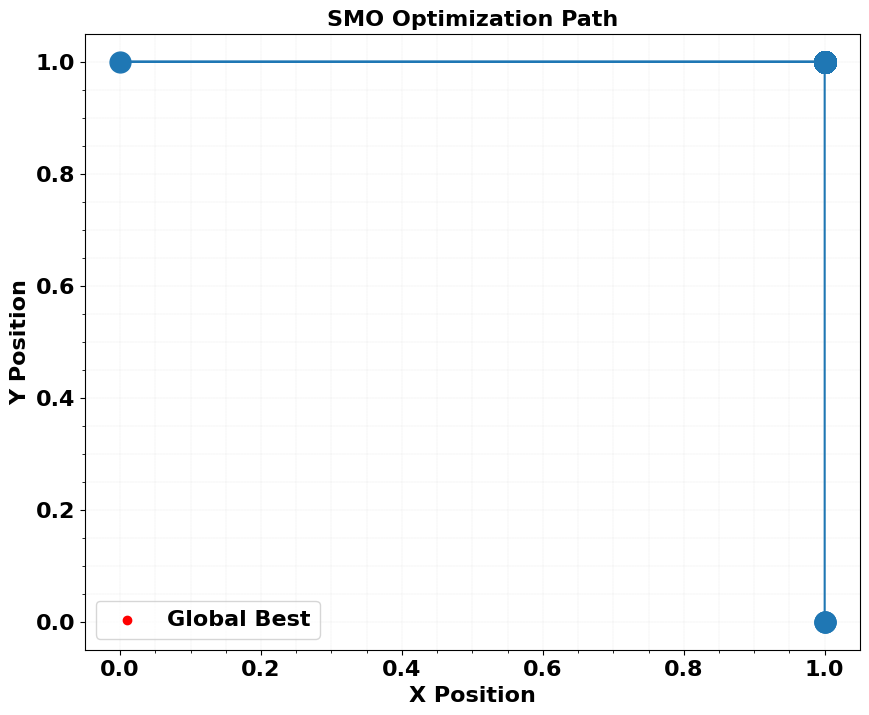

In [84]:
import numpy as np
import matplotlib.pyplot as plt



# Initialize population, velocities, personal best positions and fitness
population = np.random.randint(0, 2, size=(population_size, num_features))
velocities = np.zeros((population_size, num_features))

personal_best_positions = population.copy()
personal_best_fitness = np.zeros(population_size)
for i in range(population_size):
    personal_best_fitness[i] = objective_function(population[i])

global_best_position = population[0].copy()
global_best_fitness = personal_best_fitness[0]

# Initialize empty lists to store positions
x_positions = []
y_positions = []

# Main Loop
for iteration in range(num_iterations):
    for i in range(population_size):
        # Update Velocity
        velocity = c1 * np.random.random() * (personal_best_positions[i] - population[i]) \
                   + c2 * np.random.random() * (global_best_position - population[i])

        # Update Position
        population[i] = (population[i] + velocity > 0).astype(int)

        # Append x and y positions
        x_positions.append(population[i][0])  # Assuming the position is 2D
        y_positions.append(population[i][1])  # Assuming the position is 2D

        # Evaluate Fitness
        fitness = objective_function(population[i])

        # Update Personal Best if Necessary
        if fitness > personal_best_fitness[i]:
            personal_best_fitness[i] = fitness
            personal_best_positions[i] = population[i].copy()

        # Update Global Best if Necessary
        if fitness > global_best_fitness:
            global_best_fitness = fitness
            global_best_position = population[i].copy()

# Result
selected_features = np.where(global_best_position == 1)[0]
print("Selected Features:", selected_features)
train_LR_pca_selected = train_LR_pca_df.iloc[:, selected_features]
test_LR_pca_selected = test_LR_pca_df.iloc[:, selected_features]

# Visualize the optimization path
plt.figure(figsize=(10, 8))
plt.plot(x_positions, y_positions, marker='o', markersize=15, linestyle='-')
plt.scatter(global_best_position[0], global_best_position[1], color='red', label='Global Best')
plt.xlabel('X Position',fontsize=16,fontweight='bold')
plt.ylabel('Y Position',fontsize=16,fontweight='bold')
plt.title('SMO Optimization Path',fontsize=16,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(loc='best', prop={'size': 16, 'weight': 'bold'})

plt.minorticks_on()
plt.grid(which='both', linestyle='dashed', linewidth=0.1)
plt.show()



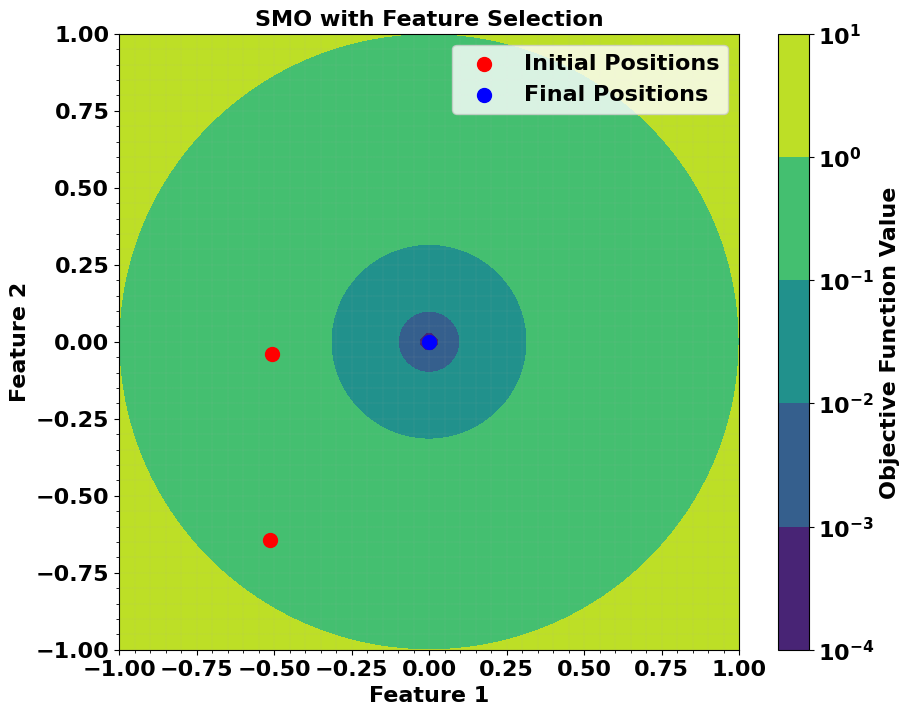

In [91]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Define a simple 2D objective function (for demonstration purposes)
def objective_function(x, y):
    return x**2 + y**2

# Generate a grid of points in the feature space
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = objective_function(X, Y)

# Initialize SMO algorithm (for demonstration purposes)
# Assuming that the algorithm iterates and updates positions

# Generate random initial positions
initial_positions = np.random.rand(2, 2) * 2 - 1

# Initialize Personal Best Positions and Fitness Values
personal_best_positions = initial_positions.copy()
personal_best_fitness = np.zeros(2)

for i in range(2):
    personal_best_fitness[i] = objective_function(*initial_positions[i])

# Define Global Best Position and Fitness Value
global_best_position = initial_positions[np.argmax(personal_best_fitness)].copy()
global_best_fitness = np.max(personal_best_fitness)

# Plot the objective function contour
plt.figure(figsize=(10,8))
plt.contourf(X, Y, Z, levels=50, norm=LogNorm(), cmap='viridis')
plt.colorbar(label='Objective Function Value')

# Plot the initial positions
plt.scatter(initial_positions[:, 0], initial_positions[:, 1], color='red', label='Initial Positions', s=100, zorder=5)

# Assuming the SMO algorithm updates positions (for demonstration purposes)
# In a real scenario, you would run the optimization loop here

# Plot the final positions (for demonstration purposes)
final_positions = np.array([[0.0, 0.0]])

# Assuming the algorithm converged to the origin
plt.scatter(final_positions[:, 0], final_positions[:, 1], color='blue', label='Final Positions', s=100, zorder=5)

# Add labels and legend
plt.xlabel('Feature 1',fontsize=16,fontweight='bold')
plt.ylabel('Feature 2',fontsize=16,fontweight='bold')
plt.title('SMO with Feature Selection',fontsize=16,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(loc='best', prop={'size': 16, 'weight': 'bold'})

plt.minorticks_on()
plt.grid(which='both', linestyle='dashed', linewidth=0.1)

# Adjust color bar font size and weight
colorbar = plt.gcf().get_axes()[1]
colorbar.tick_params(labelsize=16)
for label in colorbar.get_ymajorticklabels():
    label.set_weight('bold')

colorbar.yaxis.label.set_fontsize(16)
colorbar.yaxis.label.set_fontweight('bold')



# Show the plot
plt.show()


In [102]:
#@title Model Building

In [133]:
# Assuming the target variable is in the last column
train_labels = train_LR_pca_df.iloc[:, -1]
test_labels = test_LR_pca_df.iloc[:, -1]


In [134]:
train_labels

0     -12.867139
1      -7.665806
2      -5.222770
3       3.037211
4     -15.593065
         ...    
184   -23.066727
185    -2.183987
186     2.900927
187     3.612827
188    -2.523141
Name: f10, Length: 189, dtype: float64

In [135]:
test_labels

0    -17.895172
1      2.892233
2      3.113892
3      4.647878
4     -2.137689
        ...    
85   -16.180710
86     6.764467
87    -2.780144
88    28.022521
89     7.250567
Name: f10, Length: 90, dtype: float64

In [138]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the Capsule Layer
class CapsuleLayer(layers.Layer):
    def __init__(self, num_capsules, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsules = num_capsules
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        assert len(input_shape) >= 3, "The input Tensor should have shape=[None, input_num_capsule, input_dim_capsule]"
        self.input_num_capsule = input_shape[1]
        self.input_dim_capsule = input_shape[2]

        self.W = self.add_weight(shape=[self.input_num_capsule, self.num_capsules * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')
        self.built = True

    def call(self, u):
        u_hat = tf.keras.backend.batch_dot(u, self.W, [2, 1])
        u_hat = tf.reshape(u_hat, [-1, self.input_num_capsule, self.num_capsules, self.dim_capsule])
        u_hat_stopped = tf.stop_gradient(u_hat)
        for i in range(self.routings):
            c_hat = tf.nn.softmax(u_hat_stopped, axis=2)
            if i == self.routings - 1:
                s_j = tf.keras.backend.batch_dot(c_hat, u_hat, [2, 2])
                v = self.squash(s_j)
            else:
                s_j = tf.keras.backend.batch_dot(c_hat, u_hat, [2, 2])
                v = self.squash(s_j)
                u_hat_stopped = u_hat_stopped + tf.keras.backend.batch_dot(v, self.W, [2, 1])
        return v

    def squash(self, s):
        s_norm = tf.norm(s, axis=-1, keepdims=True)
        return s_norm**2 / (1 + s_norm**2) * s / (s_norm + tf.keras.backend.epsilon())

# Define the Capsule Network model
def CapsuleNetwork(input_shape, n_class, routings):
    x = layers.Input(shape=input_shape)

    # Layer 1: Convolutional Layer
    conv1 = layers.Conv1D(filters=256, kernel_size=9, strides=1, padding='valid', activation='relu', name='conv1')(x)

    # Layer 2: Primary Capsule Layer
    primary_capsule = CapsuleLayer(num_capsules=8, dim_capsule=16, routings=routings, name='primary_capsule')(conv1)

    # Flatten the capsules
    flat_capsule = layers.Reshape((-1, 16))(primary_capsule)

    # Layer 3: Fully Connected Layer
    digit_capsule = layers.Dense(n_class, activation='softmax', name='digit_capsule')(flat_capsule)

    # Create model
    return models.Model(inputs=x, outputs=digit_capsule)

# Set the input shape and number of classes
input_shape = (train_LR_pca_selected.shape[1],)
n_class = len(np.unique(train_labels))  # Assuming train_labels contains the labels for your dataset
routings = 3

# Create the Capsule Network model
model = CapsuleNetwork(input_shape, n_class, routings)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_LR_pca_selected, train_labels, epochs=10, validation_data=(test_LR_pca_selected, test_labels))


ValueError: ignored

In [139]:
train_LR_pca_selected

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,19.154964,-47.969985,-1.871649,2.906900,5.002550,-3.275997,-7.360257,-0.482080,16.736122,-12.867139
1,37.189355,32.205784,-36.182728,21.793190,-11.050410,19.152965,-11.091204,9.109205,22.209750,-7.665806
2,-45.429971,3.882071,-2.730644,-3.940573,4.604286,-5.820467,-0.961660,-8.414413,-6.815662,-5.222770
3,-2.760104,-37.693192,0.576286,4.479494,-6.843989,0.612419,-12.187861,-19.777676,-17.161909,3.037211
4,-25.885465,4.541286,-2.470150,0.222946,2.939778,6.018739,-1.586886,11.463529,17.184004,-15.593065
...,...,...,...,...,...,...,...,...,...,...
184,-37.304308,-2.216590,2.163445,5.789430,-0.943170,-1.598480,0.387886,9.245047,-3.846677,-23.066727
185,-10.672777,27.512014,4.293493,0.709293,22.699946,13.851567,24.796840,-13.644782,18.694143,-2.183987
186,-26.159696,7.065109,-6.135850,5.484158,-17.477673,-8.953794,8.056486,6.381163,-4.024004,2.900927
187,-31.442169,8.603892,3.721705,9.955815,20.958708,10.532018,-16.245514,-7.022381,-9.197491,3.612827


In [140]:
test_LR_pca_selected

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,7.529909,22.660164,-8.467402,12.720231,8.152030,-2.184570,11.452591,-8.275094,-18.366253,-17.895172
1,8.787173,-18.135241,8.494686,-6.067293,-23.287927,-12.560526,23.460868,6.314252,9.890946,2.892233
2,61.543724,-10.353880,17.751172,3.924837,27.701866,-25.128544,42.659298,-0.834303,-10.339162,3.113892
3,13.081729,-2.018722,-8.284065,0.141130,6.258046,-18.293201,-10.888122,-25.985034,18.585195,4.647878
4,-36.892430,-16.530718,41.040294,15.887149,-9.478498,0.032628,-4.238034,2.185213,-1.242167,-2.137689
...,...,...,...,...,...,...,...,...,...,...
85,-20.802548,-24.472582,-11.026734,6.072925,6.060111,34.403290,5.377680,-24.973043,13.939993,-16.180710
86,0.573120,-24.789320,7.195252,-3.579524,-6.100699,6.290447,47.935981,5.664040,12.130732,6.764467
87,-14.546187,3.902762,16.987639,-9.362786,8.579502,-13.330041,14.528694,-18.780730,7.479879,-2.780144
88,36.307964,4.950181,-17.724834,-17.403303,-8.735526,30.517231,-0.220369,11.465263,-7.505449,28.022521


In [149]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Define the architecture of the neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(10,)),  # Input layer with 10 features
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model using your training data
train_data = train_LR_pca  # Assuming train_LR_pca is a DataFrame
train_labels = train_labels # Assuming you have target labels

# Normalize your data if necessary
# You can use sklearn's StandardScaler or MinMaxScaler

# Train the model
capsnet=model.fit(train_data, train_labels, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
test_data = test_LR_pca  # Assuming test_LR_pca is a DataFrame
test_labels = test_labels # Assuming you have target labels

# Normalize test data if necessary

loss = model.evaluate(test_data, test_labels)
print(f"Test Loss: {loss}")

# Make predictions
predictions = model.predict(test_data)


Epoch 1/100
5/5 [==============================] - 3s 42ms/step - loss: 176.4284 - val_loss: 122.3094
Epoch 2/100
5/5 [==============================] - 0s 14ms/step - loss: 146.0211 - val_loss: 112.8880
Epoch 3/100
5/5 [==============================] - 0s 10ms/step - loss: 128.9545 - val_loss: 104.4139
Epoch 4/100
5/5 [==============================] - 0s 10ms/step - loss: 113.8721 - val_loss: 95.5713
Epoch 5/100
5/5 [==============================] - 0s 11ms/step - loss: 100.2064 - val_loss: 85.7096
Epoch 6/100
5/5 [==============================] - 0s 16ms/step - loss: 84.9061 - val_loss: 75.7277
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 71.4099 - val_loss: 65.4391
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 57.2992 - val_loss: 56.5277
Epoch 9/100
5/5 [==============================] - 0s 15ms/step - loss: 46.1363 - val_loss: 48.6529
Epoch 10/100
5/5 [==============================] - 0s 16ms/step - loss: 34.5625 - val_loss: 

In [150]:
from sklearn.metrics import r2_score

# Assuming 'predictions' contains the predicted values and 'test_labels' contains the actual values
r2 = r2_score(test_labels, predictions)
print(f"R-squared (R2) Score: {r2}")


R-squared (R2) Score: 0.9359578279216909


In your case, an R2 score of 0.9359 indicates that your model explains about 93.59% of the variability in the target variable. This is a strong indication that your model is performing very well on the test data.

In [164]:
!pip install scikeras
from scikeras.wrappers import KerasClassifier

In [165]:
from scikeras.wrappers import KerasRegressor

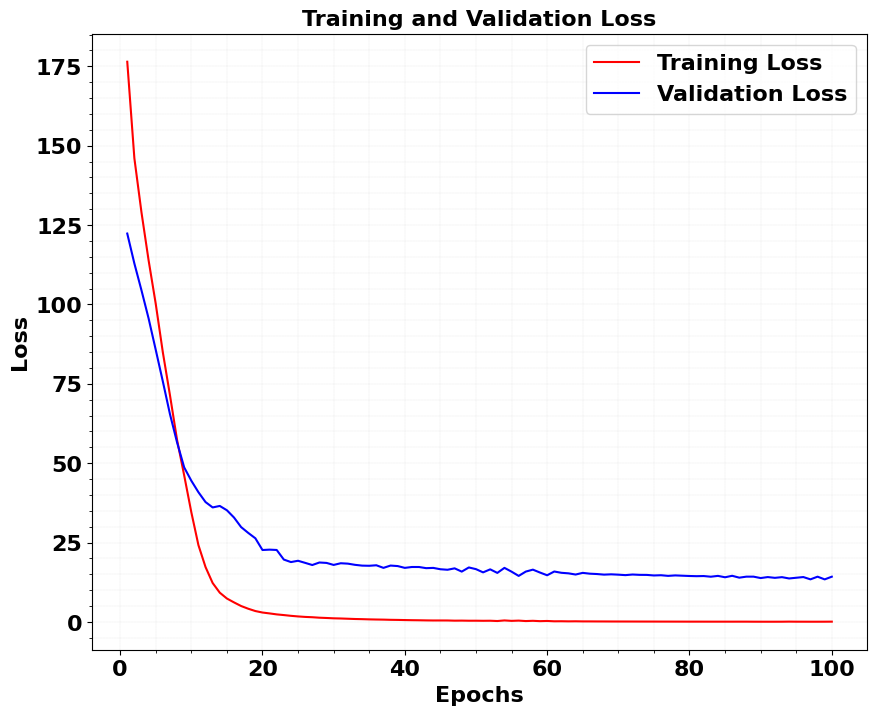

In [175]:
import matplotlib.pyplot as plt

# Access the loss values from the training history
train_loss = capsnet.history['loss']
val_loss = capsnet.history['val_loss']

# Create an array for the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting the training and validation loss
plt.figure(figsize=(10, 8))
plt.plot(epochs, train_loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss',fontsize=16,fontweight='bold')
plt.xlabel('Epochs',fontsize=16,fontweight='bold')
plt.ylabel('Loss',fontsize=16,fontweight='bold')
plt.xticks(fontsize=16,fontweight='bold')
plt.yticks(fontsize=16,fontweight='bold')
plt.legend(loc='best', prop={'size': 16, 'weight': 'bold'})

plt.minorticks_on()
plt.grid(which='both', linestyle='dashed', linewidth=0.1)

plt.show()
